<a href="https://colab.research.google.com/github/Sandanu87/Nextgen-Analytics-Modified-/blob/main/PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Uploading files
from google.colab import files
data = files.upload()

Saving traincsv.csv to traincsv.csv


In [ ]:
#Loading data into a pandas dataframe
data = pd.read_csv('traincsv.csv', low_memory=False)

In [ ]:
#Displaying first five rows
data.head()

Customer_ID outlet_city luxury_sales fresh_sales dry_sales cluster_catgeory
0   10493832.0    Kelaniya       1209.6         756      5292                4
1   10178643.0    Moratuwa      1590.12     1060.08   6007.12                1
2   10513916.0     Wattala      2288.88     1481.04   9155.52                4
3   10334589.0     Wattala      2274.94     1739.66   9099.76                4
4   10458365.0    Kelaniya      2345.49     2069.55   9243.99                4

In [ ]:
#Generating descriptive statistics
data.describe(include='all')

Customer_ID outlet_city luxury_sales fresh_sales dry_sales  \
count   7.741530e+05      774153       774120      774114    774125   
unique           NaN          20       143897      199311    195870   
top              NaN     Colombo       1029.6        1071    1915.2   
freq             NaN       41031           62          30        28   
mean    1.038708e+07         NaN          NaN         NaN       NaN   
std     2.234795e+05         NaN          NaN         NaN       NaN   
min     1.000000e+07         NaN          NaN         NaN       NaN   
25%     1.019354e+07         NaN          NaN         NaN       NaN   
50%     1.038708e+07         NaN          NaN         NaN       NaN   
75%     1.058062e+07         NaN          NaN         NaN       NaN   
max     1.077415e+07         NaN          NaN         NaN       NaN   

       cluster_catgeory  
count            774154  
unique               12  
top                   1  
freq             188984  
mean                NaN  
std                 NaN  
min                 NaN  
25%                 NaN  
50%                 NaN  
75%                 NaN  
max                 NaN

In [ ]:
#Generating dataset dimensions
data.shape

(774155, 6)

In [ ]:
#Generating dataframe columns
data.columns

Index(['Customer_ID', 'outlet_city', 'luxury_sales', 'fresh_sales',
       'dry_sales', 'cluster_catgeory'],
      dtype='object')

In [ ]:
#Examining the data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


In [ ]:
#Examining duplicate data
data['Customer_ID'].duplicated().sum()

np.int64(1)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
#Examining number of unique data in customer id column
data['Customer_ID'].nunique()

774153

In [ ]:
#Examining number of unique data in cluster_catgeory column
data['cluster_catgeory'].nunique()

12

In [ ]:
#Checking the null values
data.isnull().sum()

Customer_ID          2
outlet_city          2
luxury_sales        35
fresh_sales         41
dry_sales           30
cluster_catgeory     1
dtype: int64

In [ ]:
#Dropping duplicate data in Customer_ID
data.drop_duplicates(subset='Customer_ID', inplace=True, keep='first')

In [ ]:
#Dropping missing values
data.dropna(subset=['Customer_ID'], inplace=True)

In [ ]:
data.isnull().sum()

Customer_ID          0
outlet_city          2
luxury_sales        35
fresh_sales         41
dry_sales           30
cluster_catgeory     1
dtype: int64

In [ ]:
#Filling the missing data using random sampling imputation
non_missing_values = data['outlet_city'].dropna()
data['outlet_city'] = data['outlet_city'].fillna(pd.Series(np.random.choice(non_missing_values, size=data['outlet_city'].isnull().sum())).values)

In [ ]:
data.isnull().sum()

Customer_ID          0
outlet_city          0
luxury_sales        35
fresh_sales         41
dry_sales           30
cluster_catgeory     1
dtype: int64

In [ ]:
#Converting sales columns to numeric values
str_columns = ['luxury_sales','fresh_sales','dry_sales']

for column in str_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [ ]:
#Describing data after changing data types
data.describe()

Customer_ID   luxury_sales    fresh_sales      dry_sales
count  7.741530e+05  774108.000000  774103.000000  774115.000000
mean   1.038708e+07    1921.967004    4428.686701    4676.276397
std    2.234795e+05    1004.078975    3334.656202    3409.388418
min    1.000000e+07     500.000000     500.000000     500.000000
25%    1.019354e+07    1213.530000    1620.190000    1787.940000
50%    1.038708e+07    1715.280000    3356.540000    3727.760000
75%    1.058062e+07    2338.700000    6671.610000    7162.200000
max    1.077415e+07    6999.650000   13997.900000   13999.300000

In [ ]:
#Examining the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774153 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774108 non-null  float64
 3   fresh_sales       774103 non-null  float64
 4   dry_sales         774115 non-null  float64
 5   cluster_catgeory  774152 non-null  object 
dtypes: float64(4), object(2)
memory usage: 41.3+ MB


<Axes: >

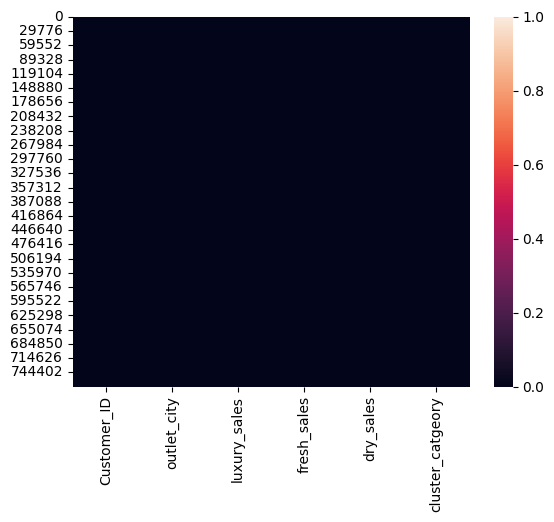

In [ ]:
#Missing data via heatmap
cols = data.columns
sns.heatmap(data[cols].isnull())

In [ ]:
#Handling missing values in sales column
luxury_mean = data['luxury_sales'].mean()
fresh_mean = data['fresh_sales'].mean()
dry_mean = data['dry_sales'].mean()

data['luxury_sales'].fillna(luxury_mean, inplace=True)
data['fresh_sales'].fillna(fresh_mean, inplace=True)
data['dry_sales'].fillna(dry_mean, inplace=True)

<ipython-input-23-a7da024e9e43>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['luxury_sales'].fillna(luxury_mean, inplace=True)
<ipython-input-23-a7da024e9e43>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
data.isnull().sum()

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    1
dtype: int64

In [ ]:
#Checking if the missing values has been handled
data.describe()

Customer_ID   luxury_sales    fresh_sales      dry_sales
count  7.741530e+05  774153.000000  774153.000000  774153.000000
mean   1.038708e+07    1921.967004    4428.686701    4676.276397
std    2.234795e+05    1004.049792    3334.548513    3409.304741
min    1.000000e+07     500.000000     500.000000     500.000000
25%    1.019354e+07    1213.560000    1620.220000    1788.000000
50%    1.038708e+07    1715.320000    3356.760000    3728.010000
75%    1.058062e+07    2338.650000    6671.280000    7161.760000
max    1.077415e+07    6999.650000   13997.900000   13999.300000

In [ ]:
#Checking unique values in cluster category
data['cluster_catgeory'].unique()

array(['4', '1', '99', '2', '5', '3', '6', '6\\', '95', '98', nan, '100',
       '89'], dtype=object)

In [ ]:
#Checking missing values in cluster_category
data['cluster_catgeory'].isnull().sum()

np.int64(1)

In [ ]:
!pip install plotly
import plotly.express as px

In [ ]:
fig = px.box(data, x='luxury_sales')
fig.show()

In [ ]:
fig = px.box(data, x='fresh_sales')
fig.show()

In [ ]:
fig = px.box(data, x='dry_sales')
fig.show()

In [ ]:
fig = px.box(data, x='cluster_catgeory')
fig.show()

In [ ]:
#Converting cluster_category to numeric values
data['cluster_catgeory']= pd.to_numeric(data['cluster_catgeory'],errors='coerce')

#Compute Q1, Q3, and IQR
Q1 = data['cluster_catgeory'].quantile(0.25)
Q3 = data['cluster_catgeory'].quantile(0.75)
IQR = Q3 - Q1

#Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Remove outliers
data = data[(data['cluster_catgeory'] >= lower_bound) & (data['cluster_catgeory'] <= upper_bound)]

In [ ]:
fig = px.box(data, x='cluster_catgeory')
fig.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774146 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774146 non-null  float64
 1   outlet_city       774146 non-null  object 
 2   luxury_sales      774146 non-null  float64
 3   fresh_sales       774146 non-null  float64
 4   dry_sales         774146 non-null  float64
 5   cluster_catgeory  774146 non-null  float64
dtypes: float64(5), object(1)
memory usage: 41.3+ MB


In [ ]:
data.isnull().sum()

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
dtype: int64

In [ ]:
data['cluster_catgeory'].unique()

array([4., 1., 2., 5., 3., 6.])

In [ ]:
data['cluster_catgeory'].isnull().sum()

np.int64(0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774146 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774146 non-null  float64
 1   outlet_city       774146 non-null  object 
 2   luxury_sales      774146 non-null  float64
 3   fresh_sales       774146 non-null  float64
 4   dry_sales         774146 non-null  float64
 5   cluster_catgeory  774146 non-null  float64
dtypes: float64(5), object(1)
memory usage: 41.3+ MB


In [ ]:
total_sales = data['luxury_sales'] + data['fresh_sales'] + data['dry_sales']
data['total_sales'] = total_sales

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774146 entries, 0 to 774154
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774146 non-null  float64
 1   outlet_city       774146 non-null  object 
 2   luxury_sales      774146 non-null  float64
 3   fresh_sales       774146 non-null  float64
 4   dry_sales         774146 non-null  float64
 5   cluster_catgeory  774146 non-null  float64
 6   total_sales       774146 non-null  float64
dtypes: float64(6), object(1)
memory usage: 47.3+ MB


EDA after pre-processing

<ipython-input-42-ed6d84c7426f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




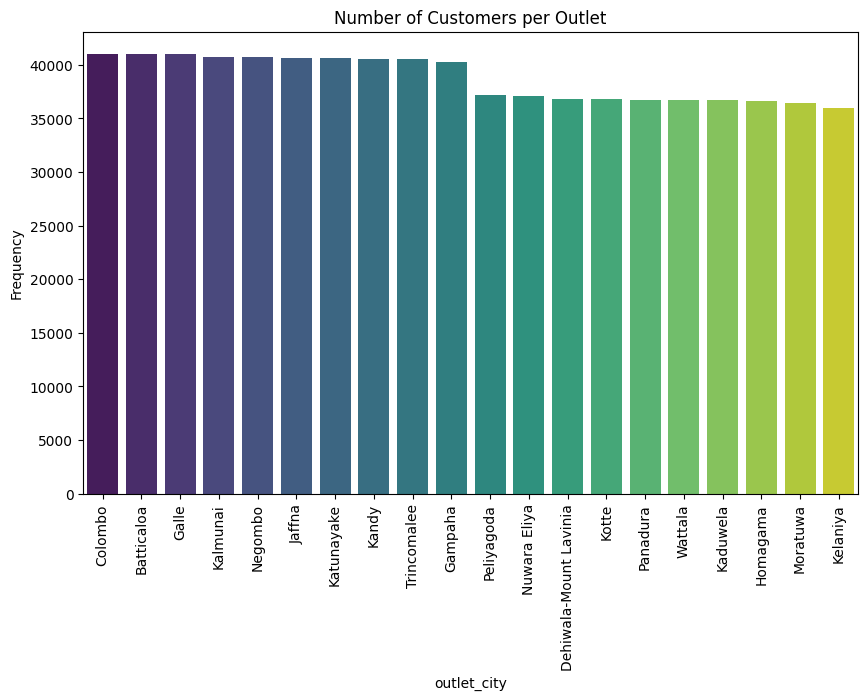

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['outlet_city'], order=data['outlet_city'].value_counts().index, palette='viridis')
plt.xlabel('outlet_city')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title("Number of Customers per Outlet")
plt.show()

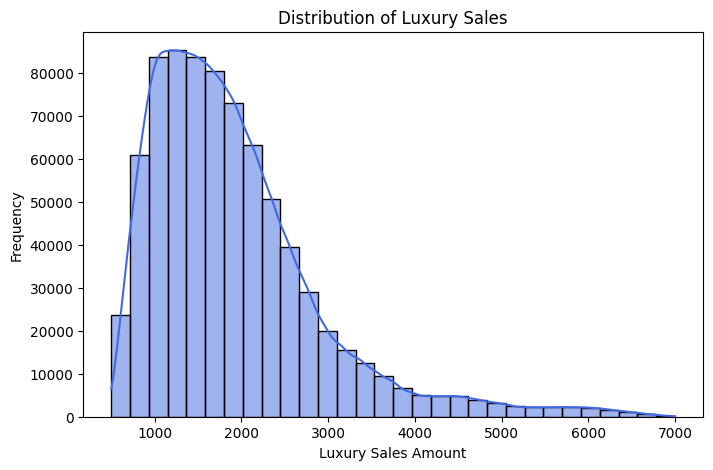

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['luxury_sales'], bins=30, kde=True, color='royalblue')
plt.title("Distribution of Luxury Sales")
plt.xlabel("Luxury Sales Amount")
plt.ylabel("Frequency")
plt.show()

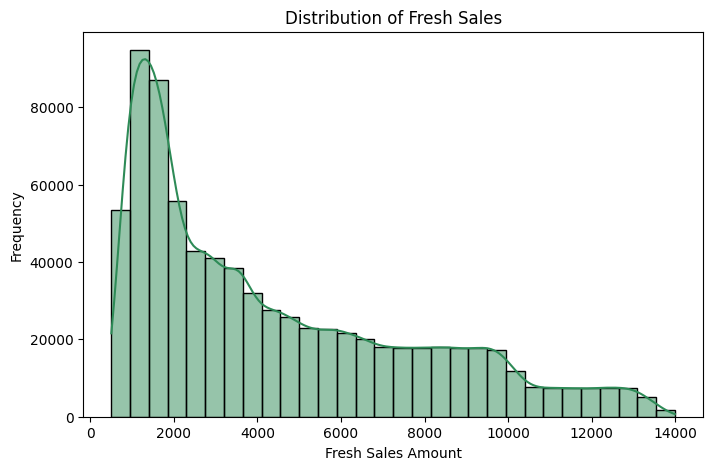

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['fresh_sales'], bins=30, kde=True, color='seagreen')
plt.title("Distribution of Fresh Sales")
plt.xlabel("Fresh Sales Amount")
plt.ylabel("Frequency")
plt.show()

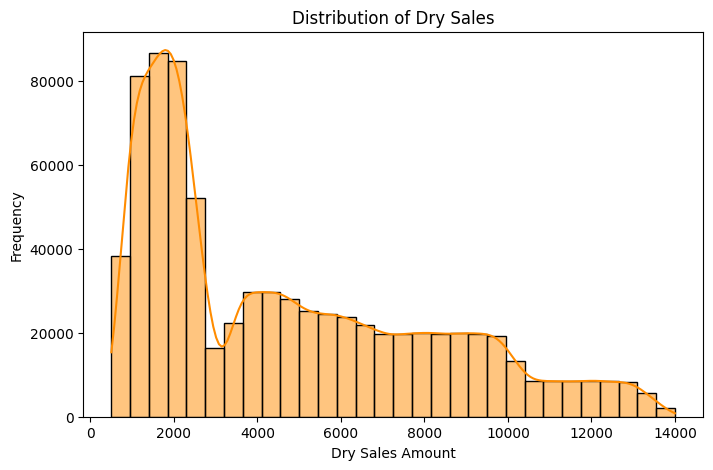

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['dry_sales'], bins=30, kde=True, color='darkorange')
plt.title("Distribution of Dry Sales")
plt.xlabel("Dry Sales Amount")
plt.ylabel("Frequency")
plt.show()

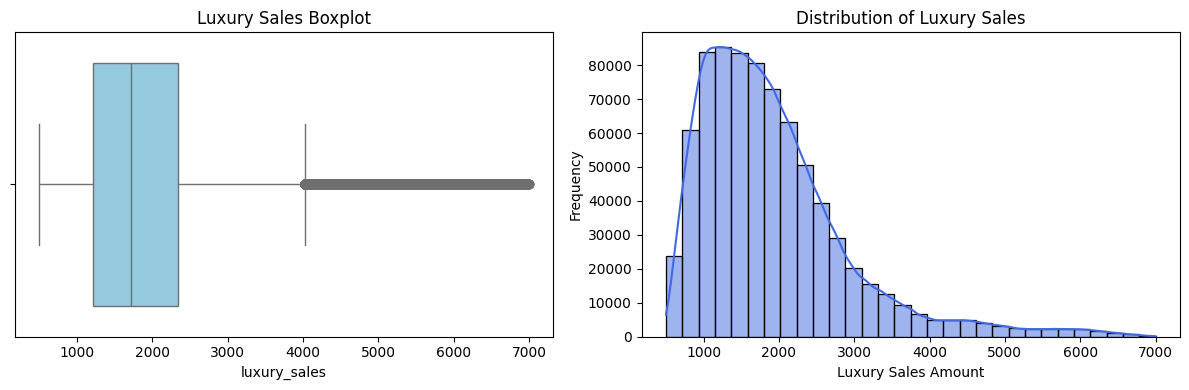

In [ ]:
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=data['luxury_sales'], color='skyblue')
plt.title('Luxury Sales Boxplot')

# Distribution Plot
plt.subplot(1, 2, 2)
sns.histplot(data['luxury_sales'], bins=30, kde=True, color='royalblue', edgecolor='black')
plt.title('Distribution of Luxury Sales')
plt.xlabel('Luxury Sales Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

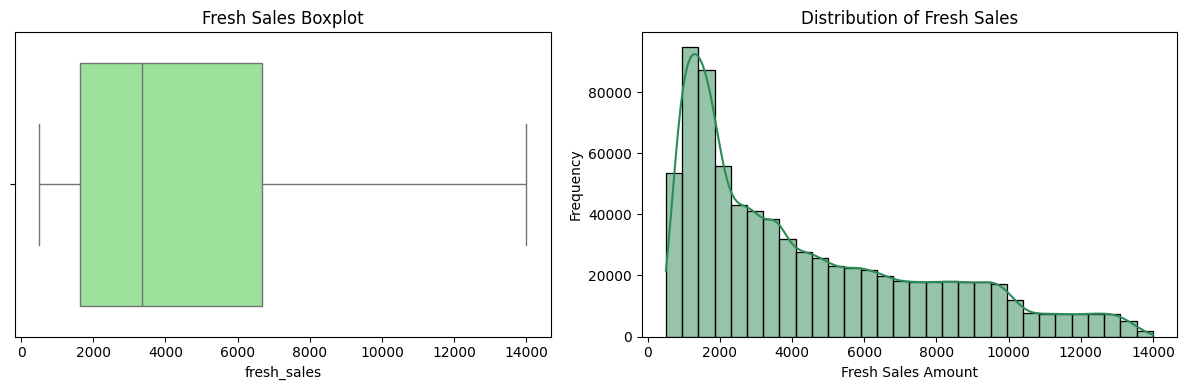

In [ ]:
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=data['fresh_sales'], color='lightgreen')
plt.title('Fresh Sales Boxplot')

# Distribution Plot
plt.subplot(1, 2, 2)
sns.histplot(data['fresh_sales'], bins=30, kde=True, color='seagreen', edgecolor='black')
plt.title('Distribution of Fresh Sales')
plt.xlabel('Fresh Sales Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

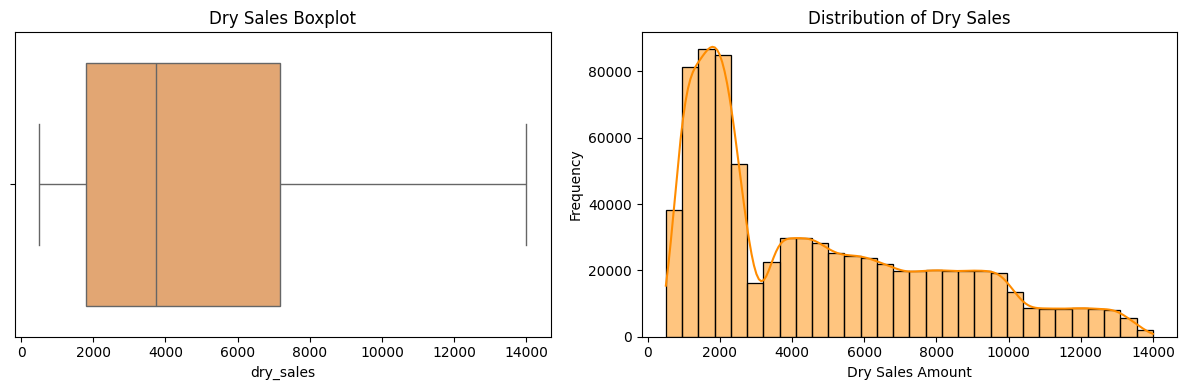

In [ ]:
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=data['dry_sales'], color='sandybrown')
plt.title('Dry Sales Boxplot')

# Distribution Plot
plt.subplot(1, 2, 2)
sns.histplot(data['dry_sales'], bins=30, kde=True, color='darkorange', edgecolor='black')
plt.title('Distribution of Dry Sales')
plt.xlabel('Dry Sales Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Bivariate Analysis

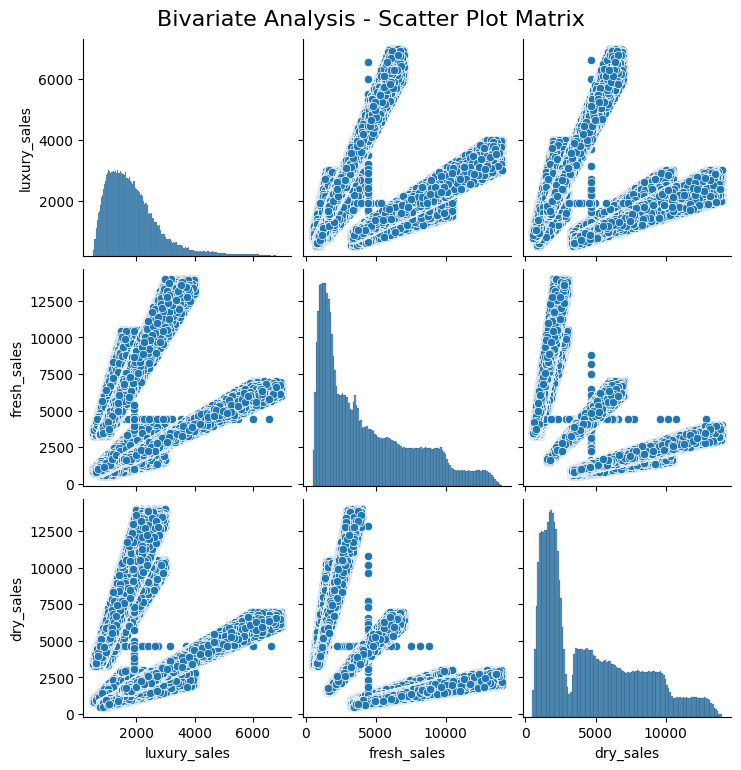

In [ ]:
# Pairplot for scatter plot matrix
sns.pairplot(data[['luxury_sales', 'fresh_sales', 'dry_sales']])
plt.suptitle('Bivariate Analysis - Scatter Plot Matrix', fontsize=16, y=1.02)
plt.show()

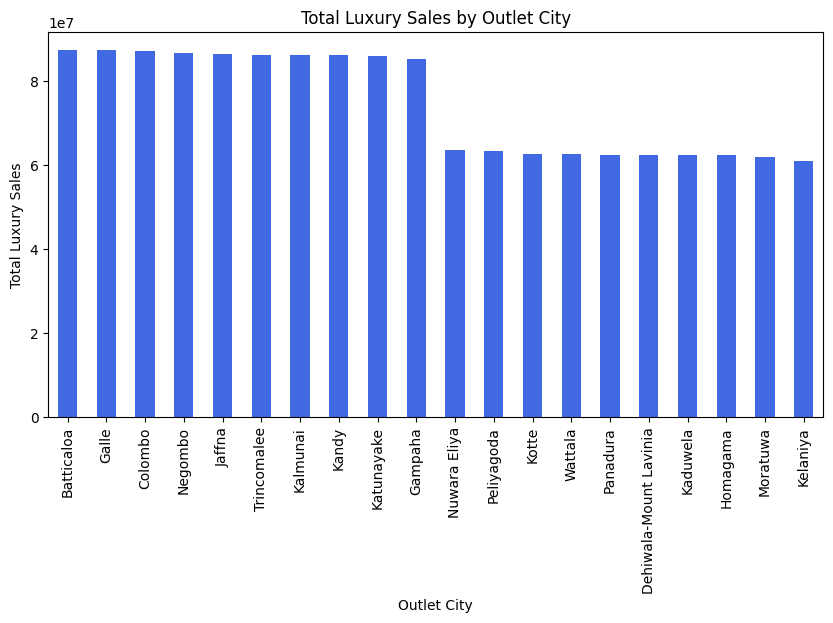

In [ ]:
plt.figure(figsize=(10, 5))
city_sales = data.groupby("outlet_city")["luxury_sales"].sum().sort_values(ascending=False)
city_sales.plot(kind='bar', color='royalblue')

plt.title("Total Luxury Sales by Outlet City")
plt.xlabel("Outlet City")
plt.ylabel("Total Luxury Sales")
plt.xticks(rotation=90)
plt.show()

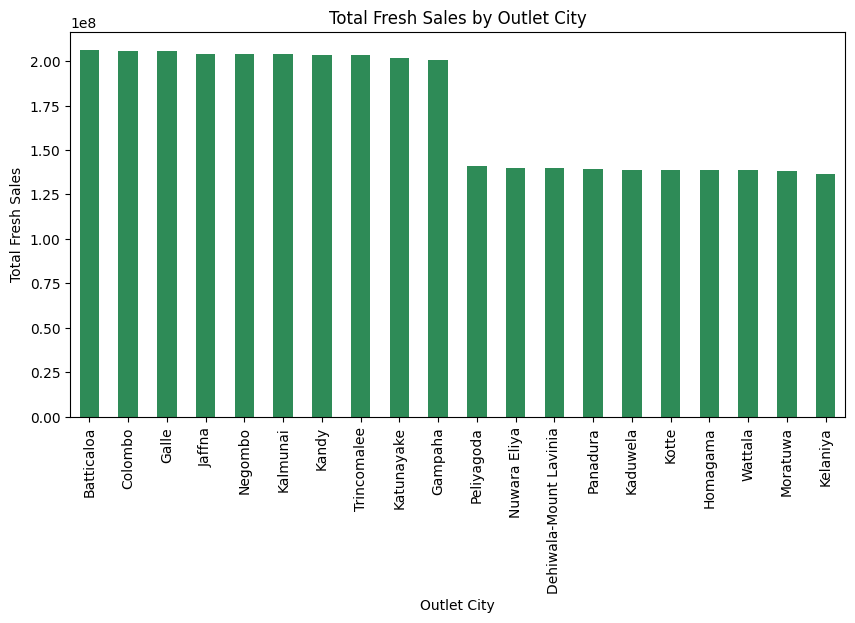

In [ ]:
plt.figure(figsize=(10, 5))
city_sales = data.groupby("outlet_city")["fresh_sales"].sum().sort_values(ascending=False)
city_sales.plot(kind='bar', color='seagreen')

plt.title("Total Fresh Sales by Outlet City")
plt.xlabel("Outlet City")
plt.ylabel("Total Fresh Sales")
plt.xticks(rotation=90)
plt.show()

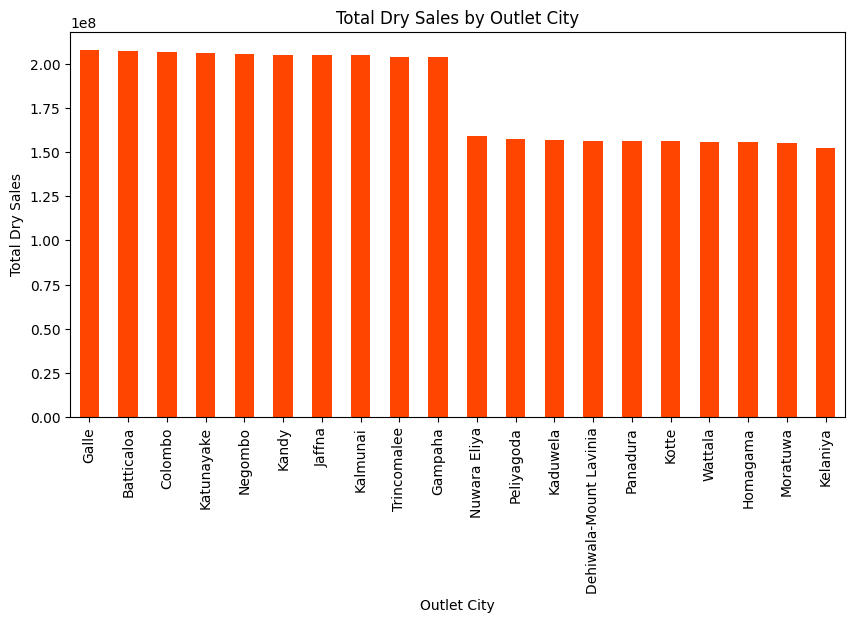

In [ ]:
plt.figure(figsize=(10, 5))
city_sales = data.groupby("outlet_city")["dry_sales"].sum().sort_values(ascending=False)
city_sales.plot(kind='bar', color='orangered')

plt.title("Total Dry Sales by Outlet City")
plt.xlabel("Outlet City")
plt.ylabel("Total Dry Sales")
plt.xticks(rotation=90)
plt.show()

In [ ]:
num_cols = ['luxury_sales', 'fresh_sales', 'dry_sales']

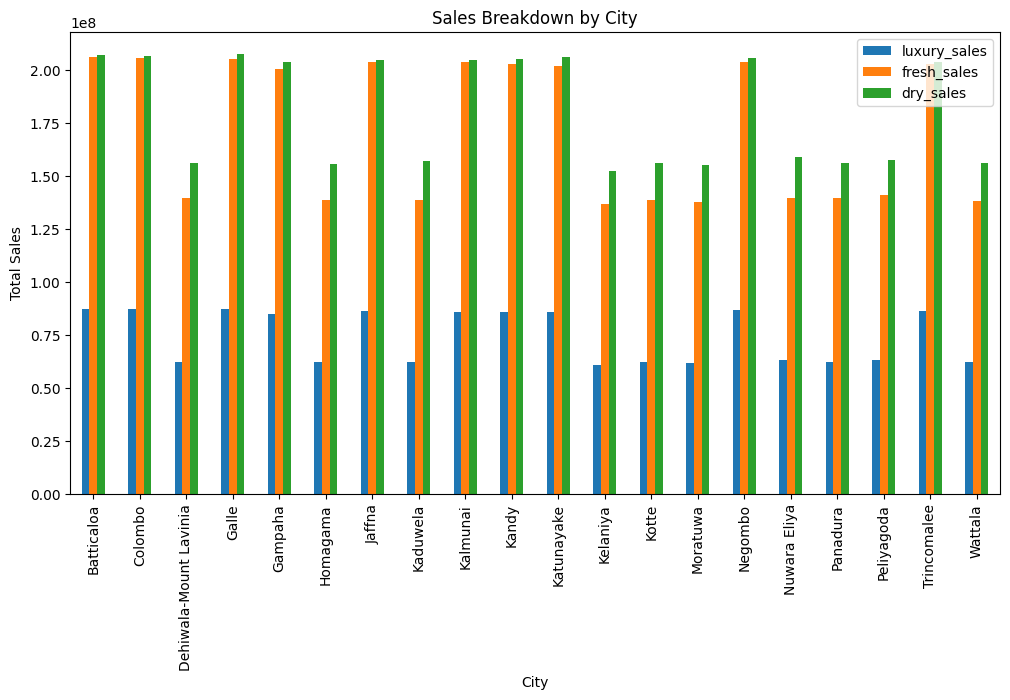

In [ ]:
city_sales = data.groupby("outlet_city")[num_cols].sum()

city_sales.plot(kind='bar', figsize=(12, 6))
plt.title("Sales Breakdown by City")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

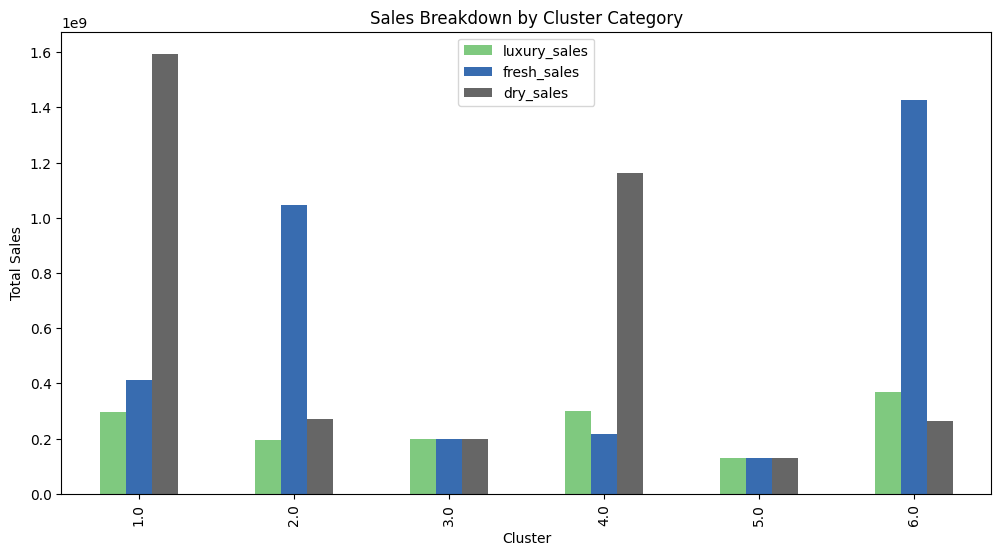

In [ ]:
city_sales = data.groupby("cluster_catgeory")[num_cols].sum()

city_sales.plot(kind='bar', figsize=(12, 6), colormap='Accent')
plt.title("Sales Breakdown by Cluster Category")
plt.xlabel("Cluster")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

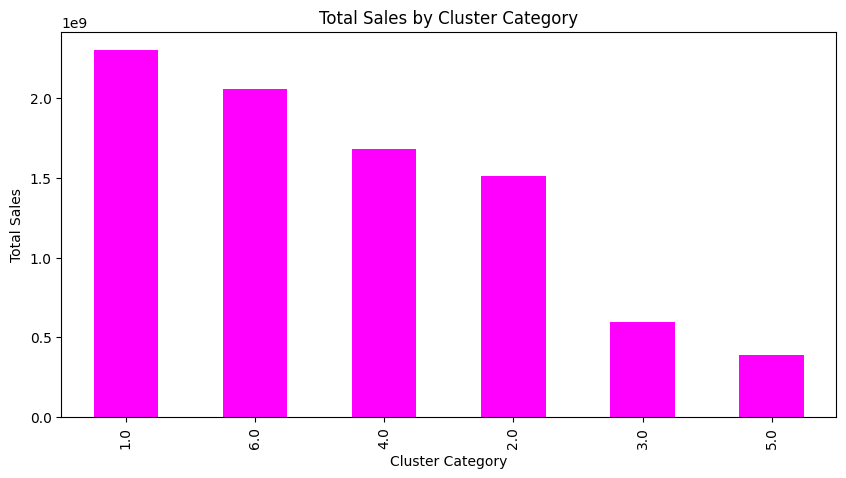

In [ ]:
plt.figure(figsize=(10, 5))
city_sales = data.groupby("cluster_catgeory")["total_sales"].sum().sort_values(ascending=False)
city_sales.plot(kind='bar', color='magenta')

plt.title("Total Sales by Cluster Category")
plt.xlabel("Cluster Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

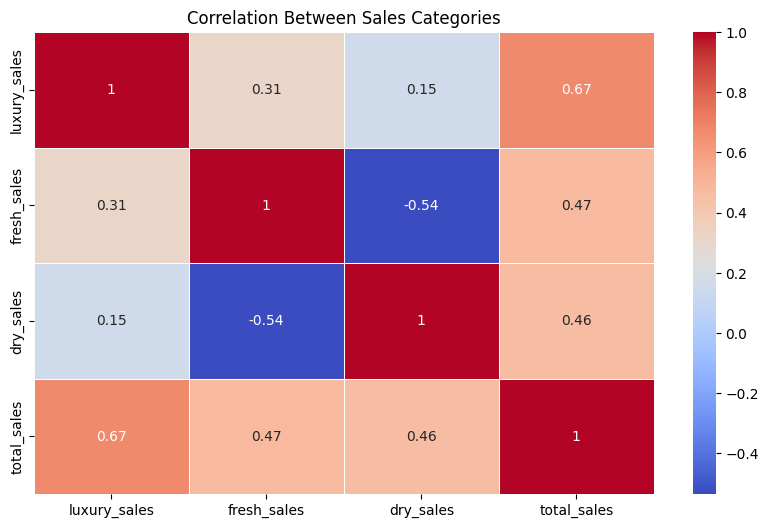

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[['luxury_sales', 'fresh_sales', 'dry_sales', 'total_sales']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Sales Categories")
plt.show()

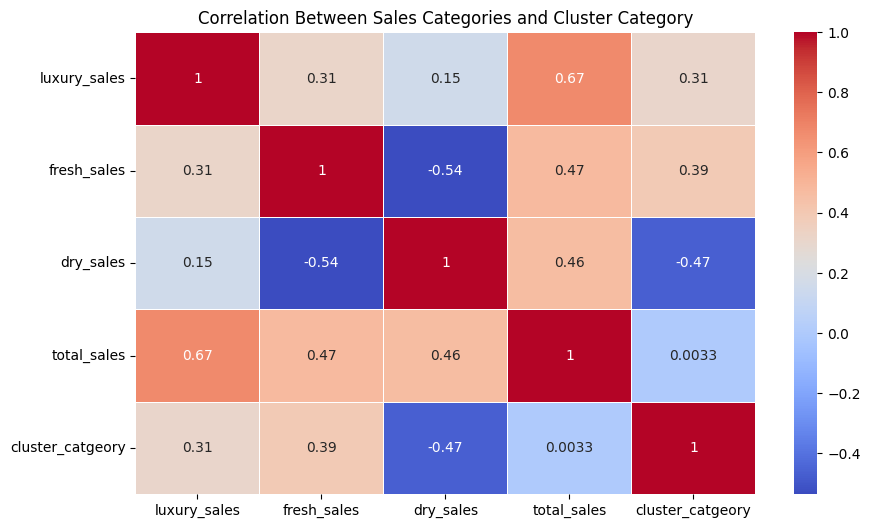

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[['luxury_sales', 'fresh_sales', 'dry_sales', 'total_sales', 'cluster_catgeory']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Sales Categories and Cluster Category")
plt.show()

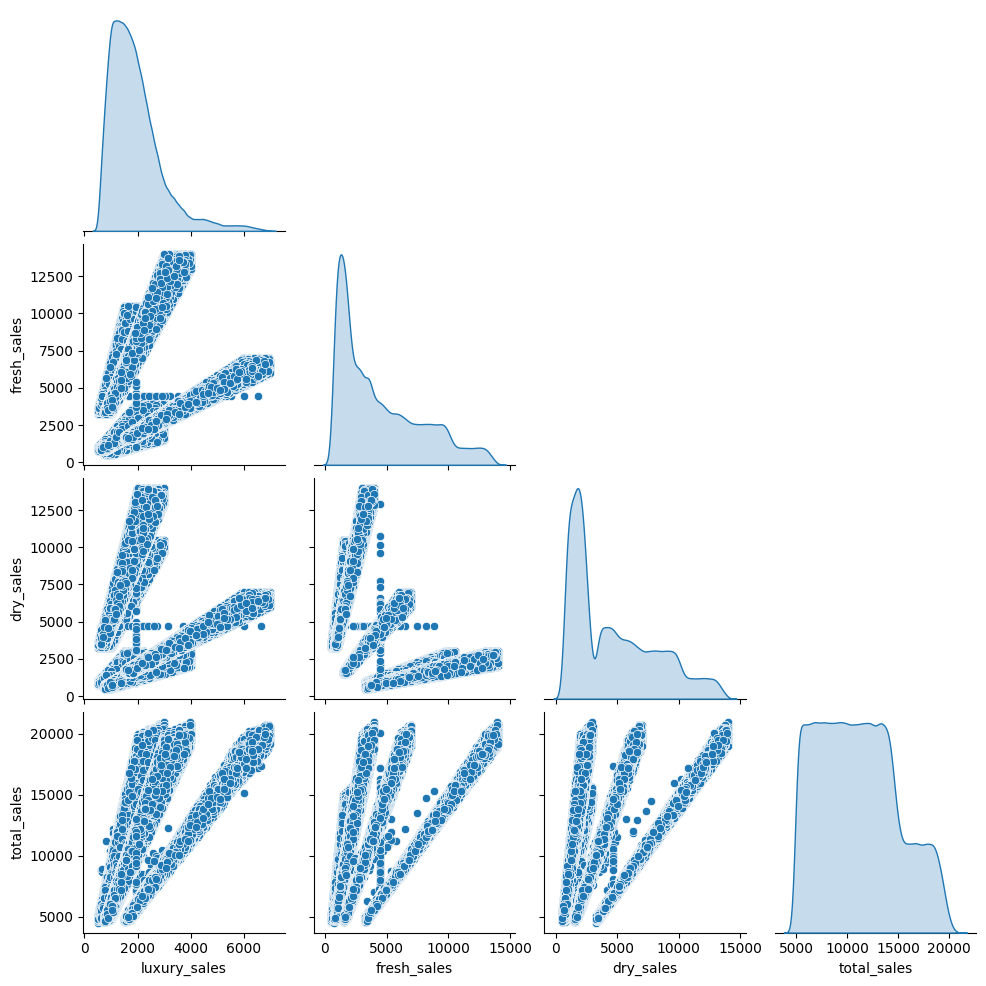

In [ ]:
sns.pairplot(data[num_cols + ['total_sales']], diag_kind='kde', corner=True)
plt.show()

In [ ]:
data.to_csv('cleaned_data.csv', index=False)